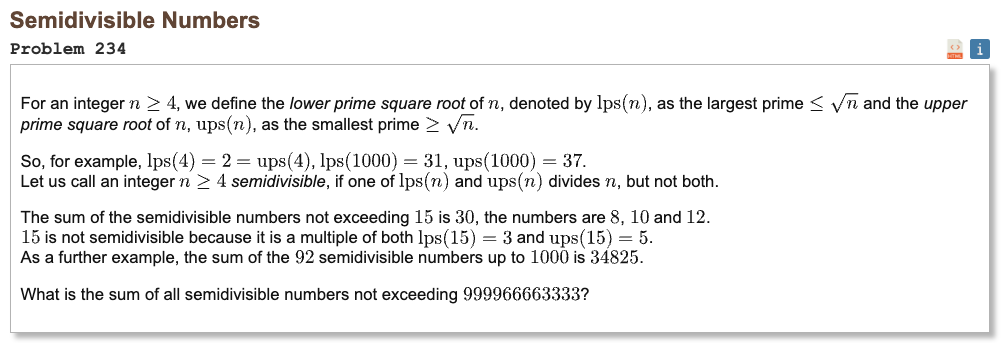

## Initial approach

* find the consecutive primes p and q such that p² < n < q², then the relevant divisors are p and q
* work interval by interval between p² and q², because the lower and upper prime square roots stay constant there
* in one interval, add all multiples of p and all multiples of q within the bounds
* remove the numbers divisible by both p and q by subtracting twice the sum of multiples of p·q in the same bounds
* compute each “sum of multiples in [L, U]” with an arithmetic series using ceil and floor division
* generate all primes up to about √N (plus a small buffer) with a sieve so every interval has its next prime q
* sum across all prime intervals until p² exceeds N

In [1]:
from math import isqrt

def sieve_primes(n):
    if n < 2:
        return []
    is_prime = bytearray(b"\x01") * (n + 1)
    is_prime[0:2] = b"\x00\x00"
    r = isqrt(n)
    for i in range(2, r + 1):
        if is_prime[i]:
            step = i
            start = i * i
            is_prime[start:n + 1:step] = b"\x00" * (((n - start) // step) + 1)
    return [i for i in range(2, n + 1) if is_prime[i]]

def sum_multiples_in_range(k, L, U):
    a = (L + k - 1) // k
    b = U // k
    if a > b:
        return 0
    cnt = b - a + 1
    return k * (a + b) * cnt // 2

def semidivisible_sum(limit):
    bound = isqrt(limit) + 2000
    primes = sieve_primes(bound)
    total = 0
    for i in range(len(primes) - 1):
        p = primes[i]
        q = primes[i + 1]
        L = p * p + 1
        if L > limit:
            break
        U = min(q * q - 1, limit)
        if L <= U:
            total += sum_multiples_in_range(p, L, U)
            total += sum_multiples_in_range(q, L, U)
            total -= 2 * sum_multiples_in_range(p * q, L, U)
    return total

In [2]:
%%time
LIMIT = 999966663333
result = semidivisible_sum(LIMIT)
print("Result:", result)

Result: 1259187438574927161
CPU times: user 109 ms, sys: 2.97 ms, total: 112 ms
Wall time: 112 ms
